# Lambda School Data Science - Unit 1 Sprint 3 Module 3

## Module Project: Multiple Linear Regression

### Learning Objectives

* model the relationship of multiple predictor variables to a single outcome
* conduct a t-test to determine the significance of individual variables in the model
* compare model fit using R-squared

### Total notebook points: 13

## Part A: Introduction

### Statistical significance between head size and brain weight in healthy adult humans

The `Brainhead.csv` dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed).

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

### Use the above information to complete the following tasks.

**Task 1** - Load the data

Let's load the data! The URL has been provided as well as the imports for pandas and numpy.

* load your CSV file into a DataFrame named `df`

In [1]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

# YOUR CODE HERE
df = pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 237


**Task 2** - Fit OLS Model

Run the OLS model relating head size to brain weight - you should have done this in your project yesterday. The `statsmodels.formula.api` import has been provided. After you fit your model, print out your model results.

* Fit an OLS model and name your variable `model`.

*Hint: Make sure to use the format Y ~ X*

In [3]:
# Task 2

# Import statsmodels - DON'T Delete
from statsmodels.formula.api import ols

# Model input format
# format Y ~ X

# YOUR CODE HERE
model = ols('Brain ~ Head', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           5.96e-54
Time:                        22:40:13   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

In [4]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 3** - Adjusted $R^2$

Using your model summary, what is the adjusted $R^2$ for this model?  

* Assign the value of adjusted $R^2$ to the variable `adj_R2` (use three decimal places, e.g. 0.123). Your variable should be a float.

In [5]:
# Task 3

# YOUR CODE HERE
adj_R2 = round( model.rsquared_adj,3)

# Print the adjusted R^2 value
print('The adjusted R^2 is: ', adj_R2)

The adjusted R^2 is:  0.638


In [6]:
# Task 3 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 4** - Interpret adjusted R-squared

Select the correct interpretation of the R-squared value you calculated in Task 3.  Specify your answer in the next code block using `answer = `.  For example, if the correct answer is choice B, you'll type `answer = 'B'`.

A: 64% of the variability in head size can be explained by differences in brain weight

B: The model is accurate 64% of the time.

C: 64% of the variability in brain weight can be explained by differences in head size

D: We are 64% confident that we can predict variability in brain weight using differences in head size.


In [7]:
# Task 4

# YOUR CODE HERE
answer = 'C'


**Task 4 Test**

In [8]:
# Task 4 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 5** - Encoding new variables

From the data dictionary for this data set:

Gender
* 1 = male
* 2 = female

Age
* 1 = younger than age 46
* 2 = age 46 and older

Right now age and gender are coded with 1 and 2.  A more conventional way to encode the data for our model would be to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new columns in the DataFrame to do this - don't overwrite the original columns!

**Your tasks:**

* Create a new Series (column) for age and give it the column name `Age_01`.
* Create a new Series (column) for gender and give it the column `Gender_01`.

In [9]:
# Task 5

# YOUR CODE HERE
df['Gender_01'] = (df['Gender'] == 2).astype(int)
df['Age_01'] = (df['Age'] == 2).astype(int)

# View the DataFrame
df

,Gender,Age,Head,Brain,Gender_01,Age_01
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0
...,...,...,...,...,...,...
232,2,2,3214,1110,1,1
233,2,2,3394,1215,1,1
234,2,2,3233,1104,1,1
235,2,2,3352,1170,1,1


In [10]:
# Task 4 - Test

assert df.shape == (237, 6), 'Did you add two new columns (and only two)?'


**Task 5** - Multiple Regression (adding in "Age")

We're going to try to improve our model by fitting a model on more than one independent parameter.

* Fit a model to Y (brain weight) and X1 and X2 (head size and age group); assign your model to the variable `model_2` (make sure to use `C(Age_01)` for the age variable)

*Hint: Enter the model in the format Y ~ X1 + X2*

In [11]:
# Task 5

# Model input format: Y ~ X1 + X2*

# YOUR CODE HERE
model_2 = ols('Brain ~ Head + C(Age_01)', data=df).fit()

# Print the model summary
print(model_2.summary())



                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           1.38e-53
Time:                        22:40:14   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        347.5505     47.811      7.

In [12]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Statistical significance

* Find the p-value for `Age_01` in your model and assign it to the variable `pval_age` (use three decimal places, e.g. 0.123). Your value should be a float.

At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

ANSWER:

At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size? Explain your answer in at least one complete sentence.

ANSWER:


In [13]:
# Task 6

# YOUR CODE HERE
pval_age = round(model_2.pvalues[1],3)
pval_age

0.029

In [14]:
# Task 6 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 7** - Adjusted $R^2$

What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  

* Assign the adjusted $R^2$ value to `adj_R2_new`. This value should be a float.

Does adding age group to the model increase the amount of variability in brain weight explained by the model?

ANSWER:

In [15]:
# Task 7

# YOUR CODE HERE
adj_R2_new = model_2.rsquared_adj

# Print the adjusted R^2 new value
print('The adjusted R^2 new is: ', adj_R2_new)

The adjusted R^2 new is:  0.6436219401471039


In [16]:
# Task 7 - Test

# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Multiple Regression (adding in Gender)

We're going to try another multiple regression to improve our model!

* Fit a model to Y (brain weight) and X1 and X2 (head size and gender); assign your model to the variable `model_3` (make sure to use `C(Gender_01)` for the age variable).

*Hint: Enter the model in the format Y ~ X1 + X2*

In [17]:
# Task 8

# Model input format: Y ~ X1 + X2*

# YOUR CODE HERE
model_3 = ols('Brain ~ Head + C(Gender_01)',data= df).fit()

# Print the model summary
print(model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           4.15e-53
Time:                        22:40:14   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           378.7139     57.29

In [18]:
# Task 8 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9** - Significance (short answer)

At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

ANSWER:

**Task 10** - Linear model equation (short answer)

Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight. *Make sure to use the correct model!*

EQUATION: 

**Task 11** - Create a plot!

Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals. You can use `matplotlib` or `seaborn`.

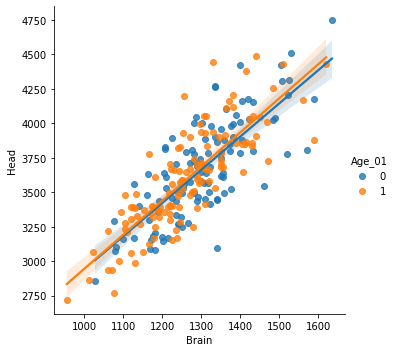

In [19]:
# Task 11
import seaborn as sns

# YOUR CODE HERE
sns.lmplot(x='Brain',y='Head', data=df,hue='Age_01')

**Task 12** - Make predictions

Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm. **Make sure to select the correct model you fit above! Look carefully at the model results so you know what order the model coefficients are given in the output.  It is *different* than the order you entered the terms in the model.**  

* assign the age group (either a 0 or 1) to the variable `x1` (integer)
* assign the head size to the variable `x2` (integer)
* assign the intercept to `intercept` (float)
* assign the slope parameter for the age to `slope1` (float)
* assign the slope parameter for head size  to `slope2` (float)
* assign the prediction to the variable `predicted` (float)

In [20]:
model_2.params

Intercept         347.550501
C(Age_01)[T.1]    -20.731645
Head                0.260439
dtype: float64

In [21]:
# Task 12

# YOUR CODE HERE
model_2.params
x1 = 1
x2 = 4000
intercept = model_2.params[0]
slope1 = model_2.params[1]
slope2 = model_2.params[2]
predicted = intercept + slope1*x1 + slope2*x2

# Print out variables to troubleshoot!
print('slope 2:', slope1)

# View your prediction
print('The predicted value for brain size is:', predicted)


slope 2: -20.73164463467088
The predicted value for brain size is: 1368.5739217220587


In [22]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 13** - Make another prediction

Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm. Use the same slope and intercept parameters you used above. But - change your `x1` and `x2` values!

* change the values for `x1` and `x2` (both are integers)
* assign your prediction to the variable `predicted_2` (float)

In [23]:
# Task 13

# YOUR CODE HERE
x1 = 0
x2 = 3900
predicted_2 = intercept + slope1*x1 + slope2*x2
# View your prediction
print('The predicted value for brain size is:', predicted_2)


The predicted value for brain size is: 1363.2616897105686


In [24]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas

## Part B

### Sleep Data

Use the following information to answer the rest of the tasks in this project.

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 

Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.

**Data Dictionary:**

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



**Task 14**

Before we can look at the data, we need to load in the data. The URL has been provided.

* Load in the CSV file as a DataFrame and assign it to the variable `df_sleep`.
* Make sure to view the DataFrame!

In [25]:
# Task 14

# Dataset URL - don't delete!
data_url_2 = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

# YOUR CODE HERE
df_sleep = pd.read_csv(data_url_2)

# Print out your DataFrame
df_sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


At the end of the guided project, we'd decided that the best model of dreaming sleep has the two variables gestation time and danger index (Adjusted R-squared about 50%).


However, danger index was engineered from both predation index and exposure.  Perhaps one of those features is really more important in predicting dreaming sleep.  Can we improve model fit by replacing danger index with predation index or exposure index?

**Task 15** - Multiple Regression Model

Run an OLS model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of the amount of time spent in dreaming sleep than danger index?
* Fit a model to Y (dreaming sleep) and X1 and X2 (gestational time and predation index); assign your model to the variable `model_sleep1` (make sure to use `C(Pred)` for the predation index variable)
* Print the model summary
* Examine the adjusted R-quared and compare it to the adjusted R-squared from the model with gestational time and danger index.
* Choose the letter of the correct answer from the answer choices listed below and assign that letter to `answer`.  For example, if your answer is choice B, in the solution block you will type `answer = 'B'`.


Answer choices:

**A:** The adjusted r-squared for the model with predation index is greater than the adjusted r-squared for the model with danger index, therefore predation index is a better predictor of dreaming sleep.

**B:** The adjusted r-squared for the model with predation index is less than than the adjusted r-squared for the model with danger index, therefore predation index is a better predictor of dreaming sleep.

**C:** The adjusted r-squared for the model with predation index is less than than the adjusted r-squared for the model with danger index, therefore predation index is not as good a predictor of dreaming sleep.

**D:** The adjusted r-squared for the model with predation index is greater than than the adjusted r-squared for the model with danger index, therefore predation index is not as good a predictor of dreaming sleep.

In [26]:
# Task 15
# complete the log of gestational time - DO NOT DELETE

import numpy as np
log_gest = np.log(df_sleep['Gest'])
model_sleep1 = ols('Parasleep ~ Gest + C(Danger)',data=df_sleep).fit()
print(model_sleep1.summary())
# YOUR CODE HERE
answer = 'C'



                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     5.457
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           0.000775
Time:                        22:40:16   Log-Likelihood:                -61.038
No. Observations:                  42   AIC:                             134.1
Df Residuals:                      36   BIC:                             144.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.4640      0.375      9.

In [27]:
# Task 15 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 16** - Multiple Regression Model

Run an OLS model using the log of gestation time and exposure index to predict the amount of time spent in dreaming sleep.  Is exposure index a better predictor of amount of time spent in dreaming sleep than danger index?
* Fit a model to Y (dreaming sleep) and X1 and X2 (gestational time and exposure index); assign your model to the variable `model_sleep2` (make sure to use `C(Exposure)` for the exposure index variable)
* Print the model summary
* Examine the adjusted R-quared and compare it to the adjusted R-squared from the model with gestational time and danger index.
* Choose the letter of the correct answer from the answer choices listed below and assign that letter to `answer`.  For example, if your answer is choice B, in the solution block you will type `answer = 'B'`.


Answer choices:

**A:** The adjusted r-squared for the model with exposure index is greater than the adjusted r-squared for the model with danger index, therefore exposure index is a better predictor of dreaming sleep.

**B:** The adjusted r-squared for the model with exposure index is less than than the adjusted r-squared for the model with danger index, therefore exposure index is a better predictor of dreaming sleep.

**C:** The adjusted r-squared for the model with exposure index is less than than the adjusted r-squared for the model with danger index, therefore exposure index is not as good a predictor of dreaming sleep.

**D:** The adjusted r-squared for the model with exposure index is greater than than the adjusted r-squared for the model with danger index, therefore exposure index is not as good a predictor of dreaming sleep.

In [28]:
# Task 16

# YOUR CODE HERE
model_sleep2 = ols('Parasleep ~ Gest + C(Exposure)',data=df_sleep).fit()
print(model_sleep2.summary())
answer = 'C'

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.263
Date:                Thu, 05 Jan 2023   Prob (F-statistic):             0.0157
Time:                        22:40:16   Log-Likelihood:                -65.035
No. Observations:                  42   AIC:                             142.1
Df Residuals:                      36   BIC:                             152.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8250      0.318  

In [29]:
# Task 16 - Test
# Hidden tests - you will see the results when you submit to Canvas